기본 세팅

In [1]:
from google.colab import drive
drive.mount('/gdrive')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rcParams["figure.figsize"] = (10,10)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


기초 통계

In [ ]:
df = pd.read_csv('/gdrive/My Drive/한양대학교/2020 프로젝트 학기제/TEST/depression_score_model_train.csv', encoding='cp949')
print(df)

In [ ]:
print('전체',len(df),'명 입니다.')
print('전체',sum(df['all']),'문장 입니다.')
print('1인당 평균',round(sum(df['all'])/len(df)),'문장 입니다.')
print('최대',max(df['all']),'문장 입니다.')
print('최소',min(df['all']),'문장 입니다.')

In [2]:
df = pd.read_excel('/gdrive/My Drive/한양대학교/2020 프로젝트 학기제/TEST/실험 참가자 명단.xlsx')
print(df)

                         타임스탬프   이름 성별  ...  기타 Unnamed: 26 Unnamed: 27
0       2020. 10. 6 오후 1:40:45  정지윤  여  ... NaN        그룹 1         NaN
1       2020. 11. 5 오후 9:03:22  이화진  여  ... NaN        그룹 1         NaN
2     2020. 11. 10 오후 11:15:31  김경신  여  ... NaN        그룹 1         NaN
3      2020. 11. 11 오후 4:44:07  김유미  여  ... NaN        그룹 1         NaN
4      2020. 11. 13 오전 6:01:29  박수은  여  ... NaN        그룹 1         NaN
5      2020. 11. 15 오후 7:01:14  조희영  여  ... NaN        그룹 1         NaN
6   2020-09-19 21:58:00.820000  송정섭  남  ... NaN        그룹 1         NaN
7       2020. 11. 5 오후 3:15:20  고형주  여  ... NaN        그룹 1         NaN
8      2020. 11. 5 오후 10:14:28  김민지  여  ... NaN        그룹 1         NaN
9     2020. 11. 16 오후 10:08:27  박지현  여  ... NaN        그룹 1         NaN
10      2020. 9. 26 오후 5:43:32  최수현  여  ... NaN        그룹 1         NaN
11      2020. 11. 5 오후 9:28:32  이수정  여  ... NaN        그룹 1         NaN
12     2020. 11. 10 오후 9:02:27  김민희  여  ... NaN        그룹 1     

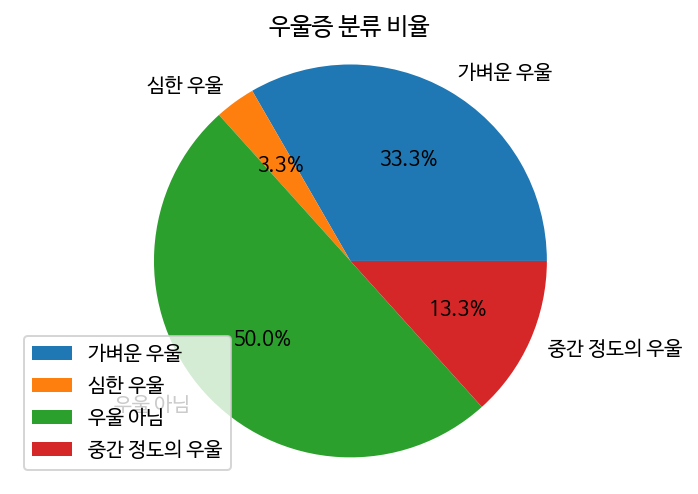

In [3]:
df['우울증 분류'] = np.nan

for i in range(len(df)):
    if df.iloc[i,20] < 5:
        df.iloc[i,-1] = '우울 아님'
    elif df.iloc[i,20] < 10:
        df.iloc[i,-1] = '가벼운 우울'
    elif df.iloc[i,20] < 20:
        df.iloc[i,-1] = '중간 정도의 우울'
    else:
        df.iloc[i,-1] = '심한 우울'

depression = df.groupby(df['우울증 분류']).count()

categories = depression.index

plt.pie(depression.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('우울증 분류 비율')
plt.legend(categories)
plt.show()

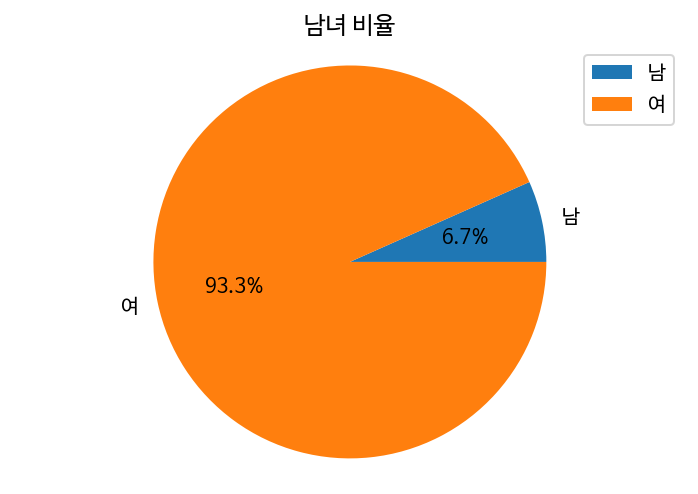

In [4]:
sex = df.groupby(df['성별']).count()

categories = sex.index

plt.pie(sex.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('남녀 비율')
plt.legend(categories)
plt.show()

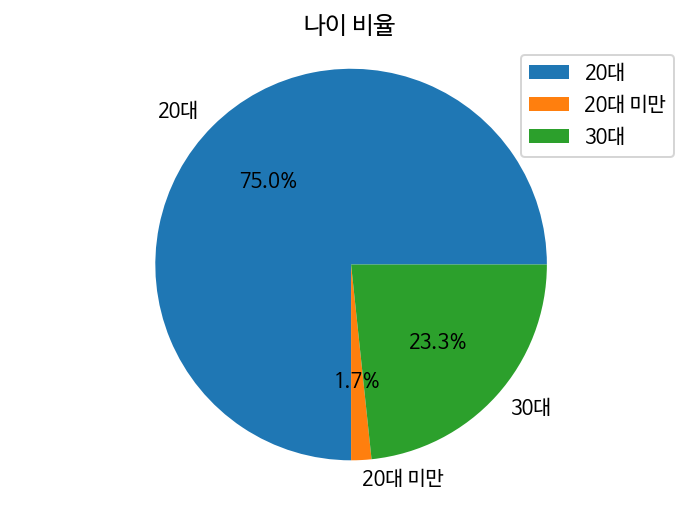

In [5]:
age = df.groupby(df['나이']).count()

categories = age.index

plt.pie(age.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('나이 비율')
plt.legend(categories)
plt.show()

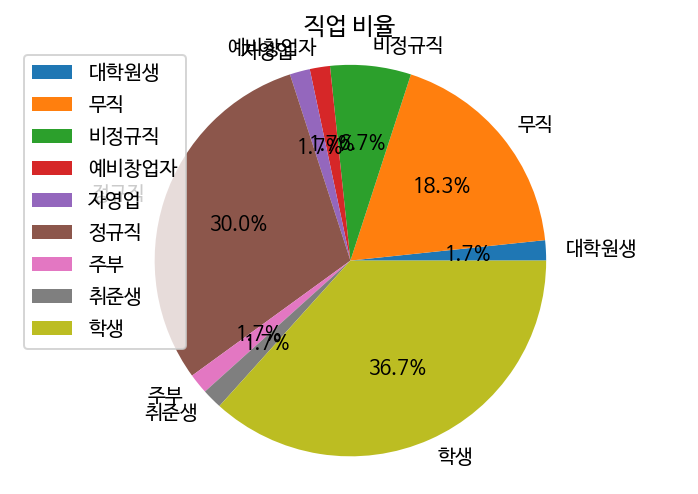

In [6]:
job = df.groupby(df["직업"]).count()

categories = job.index

plt.pie(job.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('직업 비율')
plt.legend(categories)
plt.show()

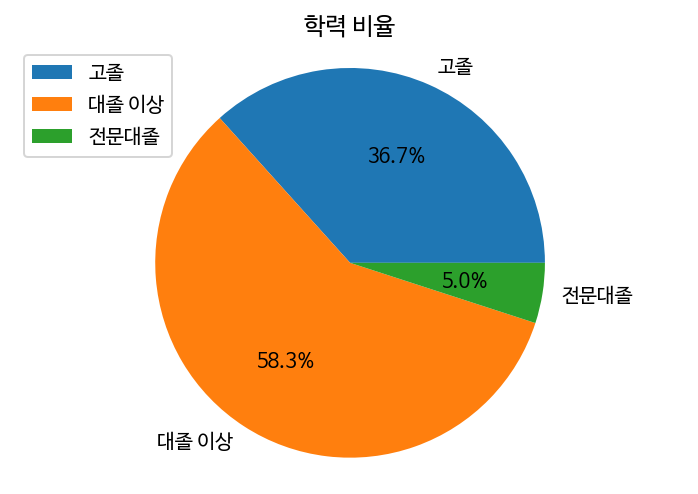

In [7]:
edu = df.groupby(df['학력']).count()

categories = edu.index

plt.pie(edu.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('학력 비율')
plt.legend(categories)
plt.show()

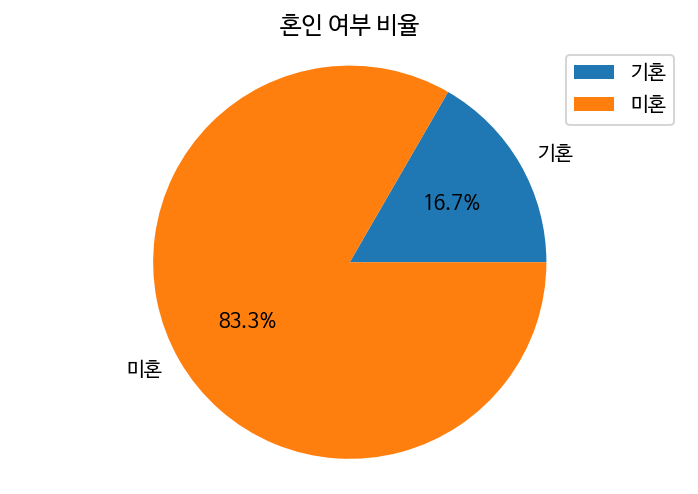

In [8]:
marry = df.groupby(df['혼인 여부']).count()

categories = marry.index

plt.pie(marry.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('혼인 여부 비율')
plt.legend(categories)
plt.show()

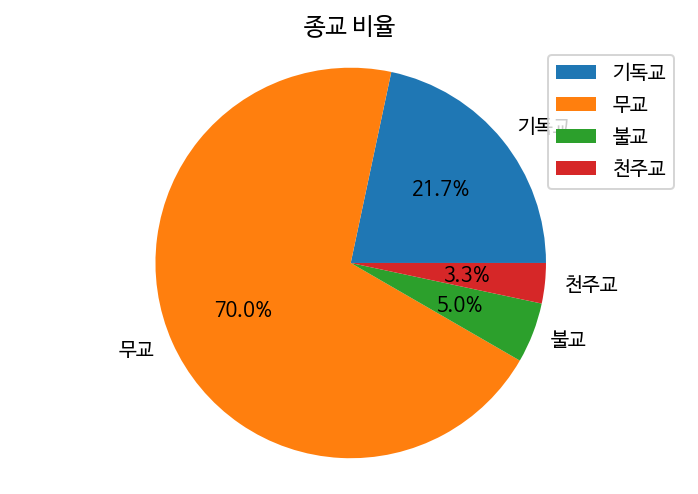

In [9]:
religion = df.groupby(df['종교']).count()

categories = religion.index

plt.pie(religion.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('종교 비율')
plt.legend(categories)
plt.show()